In [32]:
import matplotlib.pyplot as plt
import pandas as pd
from autogluon.timeseries import TimeSeriesPredictor, TimeSeriesDataFrame
import numpy as np

In [33]:
# Load data of closing transaction
df = pd.read_csv('../CSV/df_TS_week.csv')
df.head()

,item_id,timestamp,target,ACT01,ACT03,ACT04,ACT07,ACT09,ACT13,ACT15,ACT17,ACT32,ACT44
0,FR13,2019-12-30,7663.0,1267.0,299.0,0.0,2108.0,189.0,84.0,0.0,0.0,3716.0,0.0
1,FR13,2020-01-06,2917.0,1052.0,490.0,2.0,103.0,255.0,191.0,3.0,0.0,821.0,0.0
2,FR13,2020-01-13,2341.0,846.0,115.0,0.0,280.0,69.0,66.0,416.0,407.0,142.0,0.0
3,FR13,2020-01-20,3853.0,1350.0,932.0,44.0,568.0,297.0,278.0,81.0,80.0,223.0,0.0
4,FR13,2020-01-27,82251.0,1871.0,863.0,0.0,609.0,363.0,219.0,2.0,0.0,19393.0,58931.0


In [34]:
df.shape

(868, 13)

In [35]:
df["log_target"] = np.log(df.target + 1e-8)
df.head()

,item_id,timestamp,target,ACT01,ACT03,ACT04,ACT07,ACT09,ACT13,ACT15,ACT17,ACT32,ACT44,log_target
0,FR13,2019-12-30,7663.0,1267.0,299.0,0.0,2108.0,189.0,84.0,0.0,0.0,3716.0,0.0,8.944159
1,FR13,2020-01-06,2917.0,1052.0,490.0,2.0,103.0,255.0,191.0,3.0,0.0,821.0,0.0,7.978311
2,FR13,2020-01-13,2341.0,846.0,115.0,0.0,280.0,69.0,66.0,416.0,407.0,142.0,0.0,7.758333
3,FR13,2020-01-20,3853.0,1350.0,932.0,44.0,568.0,297.0,278.0,81.0,80.0,223.0,0.0,8.256607
4,FR13,2020-01-27,82251.0,1871.0,863.0,0.0,609.0,363.0,219.0,2.0,0.0,19393.0,58931.0,11.317531


In [36]:
# Split data into training and testing set; train set based on timestamp from 2020-01-01 to 2022-04-30 and test set based on timestamp from 2022-05-01 to 2023-04-30
train_data = df[df['timestamp'] <= '2022-11-30']
test_data = df[df['timestamp'] > '2022-11-30']

# Calculate the percentage of the training set and testing set
print(train_data.shape[0] / df.shape[0])
print(test_data.shape[0] / df.shape[0])

0.8790322580645161
0.12096774193548387


In [37]:
# Convert train_data to TimeSeriesDataFrame
train_data = TimeSeriesDataFrame(
    train_data, 
    id_column="item_id",
    timestamp_column="timestamp"
    
)

train_data.head()

target   ACT01  ACT03  ACT04   ACT07  ACT09  ACT13  \
item_id timestamp                                                         
FR13    2019-12-30   7663.0  1267.0  299.0    0.0  2108.0  189.0   84.0   
        2020-01-06   2917.0  1052.0  490.0    2.0   103.0  255.0  191.0   
        2020-01-13   2341.0   846.0  115.0    0.0   280.0   69.0   66.0   
        2020-01-20   3853.0  1350.0  932.0   44.0   568.0  297.0  278.0   
        2020-01-27  82251.0  1871.0  863.0    0.0   609.0  363.0  219.0   

                    ACT15  ACT17    ACT32    ACT44  log_target  
item_id timestamp                                               
FR13    2019-12-30    0.0    0.0   3716.0      0.0    8.944159  
        2020-01-06    3.0    0.0    821.0      0.0    7.978311  
        2020-01-13  416.0  407.0    142.0      0.0    7.758333  
        2020-01-20   81.0   80.0    223.0      0.0    8.256607  
        2020-01-27    2.0    0.0  19393.0  58931.0   11.317531

In [38]:
# Convert test_data to TimeSeriesDataFrame
test_data = TimeSeriesDataFrame(
    test_data, 
    id_column="item_id",
    timestamp_column="timestamp"
    
)

test_data.head()

target   ACT01  ACT03  ACT04   ACT07  ACT09  ACT13  \
item_id timestamp                                                         
FR13    2022-12-05   6672.0  4653.0  316.0    0.0   484.0  128.0   14.0   
        2022-12-12   4430.0  3524.0  140.0    0.0    53.0  171.0  291.0   
        2022-12-19   4743.0  2675.0   46.0    0.0   482.0  176.0  211.0   
        2022-12-26  47753.0   658.0  330.0    6.0    74.0  524.0  179.0   
        2023-01-02   8263.0  2565.0  152.0    2.0  2580.0  111.0   45.0   

                      ACT15    ACT17    ACT32  ACT44  log_target  
item_id timestamp                                                 
FR13    2022-12-05      5.0      2.0   1070.0    0.0    8.805675  
        2022-12-12      1.0      0.0    250.0    0.0    8.396155  
        2022-12-19     92.0     82.0    979.0    0.0    8.464425  
        2022-12-26  13129.0  13126.0  19727.0    0.0   10.773797  
        2023-01-02      0.0      0.0   2808.0    0.0    9.019543

In [39]:
# Build predictor
predictor = TimeSeriesPredictor(
    prediction_length=12,
    freq='W-MON',
    target='target',
    path='weekly_ALL_predictor',
    eval_metric='MASE'
)

In [40]:
# Fit the model
predictor.fit(
    train_data,
    presets='best_quality',
    num_val_windows=5,
    time_limit=2400,
    random_seed=42
)

Beginning AutoGluon training... Time limit = 2400s
AutoGluon will save models to 'weekly_ALL_predictor'
=================== System Info ===================
AutoGluon Version:  1.0.0
Python Version:     3.9.7
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22631
CPU Count:          8
GPU Count:          0
Memory Avail:       6.08 GB / 15.78 GB (38.5%)
Disk Space Avail:   106.34 GB / 475.83 GB (22.3%)
Setting presets to: best_quality

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': MASE,
 'freq': 'W-MON',
 'hyperparameters': 'default',
 'known_covariates_names': [],
 'num_val_windows': 5,
 'prediction_length': 12,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 42,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'target': 'target',
 'time_limit': 2400,
 'verbosity': 2}

train_data with frequency 'None' has been resampled to frequency 'W-MON'.
train_data contains missing values represented by NaN. They

In [41]:
# Make prediction on training data
predictions = predictor.predict(train_data, random_seed=42)
predictions.head()

data with frequency 'None' has been resampled to frequency 'W-MON'.


data contains missing values represented by NaN. They have been filled by carrying forward the last valid observation.
Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble


mean          0.1           0.2           0.3  \
item_id timestamp                                                           
FR13    2022-12-05   8303.881942  2815.166571   3728.267155   5306.890434   
        2022-12-12   2341.631139 -1086.053857   -227.695973    827.473044   
        2022-12-19   4804.512674 -2068.255425    183.878004   1884.980383   
        2022-12-26  33796.953575  9075.855295  17267.772285  23752.085163   
        2023-01-02  12743.981754  2505.027994   6028.911524   8151.299975   

                             0.4           0.5           0.6           0.7  \
item_id timestamp                                                            
FR13    2022-12-05   6126.994274   8303.881942   9731.783540  10788.408621   
        2022-12-12   1208.634501   2341.631139   2575.022550   3800.999919   
        2022-12-19   3176.026501   4804.512674   6602.812103   9020.563818   
        2022-12-26  28307.696222  33796.953575  38487.767693  41817.494167   
        2023-01-02   9922.706853  12743.981754  14856.707571  17983.683556   

                             0.8           0.9  
item_id timestamp                               
FR13    2022-12-05  12203.788291  18629.590497  
        2022-12-12   4894.826764  10806.195980  
        2022-12-19  13224.561522  22633.223522  
        2022-12-26  47433.874720  55314.569179  
        2023-01-02  20959.822405  28207.655682

In [42]:
predictor.leaderboard(test_data)

Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).


,model,score_test,score_val,pred_time_test,pred_time_val,fit_time_marginal,fit_order
0,WeightedEnsemble,-0.290087,-0.469493,0.413150,0.483554,10.502023,12
1,PatchTST,-0.347885,-0.521857,0.047347,0.025157,263.303959,11
2,DeepAR,-0.357356,-0.532345,0.146155,0.301302,423.847639,9
3,TemporalFusionTransformer,-0.373707,-0.495551,0.094179,0.047292,582.780537,10
4,DirectTabular,-0.485321,-0.533624,0.125469,0.109803,6.264242,8
5,NPTS,-0.505836,-0.553215,0.065415,0.078149,0.360498,3
6,DynamicOptimizedTheta,-0.581542,-0.767050,27.793128,0.631752,28.342074,5
7,AutoETS,-0.591937,-0.769080,40.949340,0.059329,43.256404,4
8,AutoARIMA,-0.663770,-0.767599,30.934246,2.130401,39.899737,6
9,CrostonSBA,-0.682689,-0.764697,27.829939,0.031223,22.536901,2


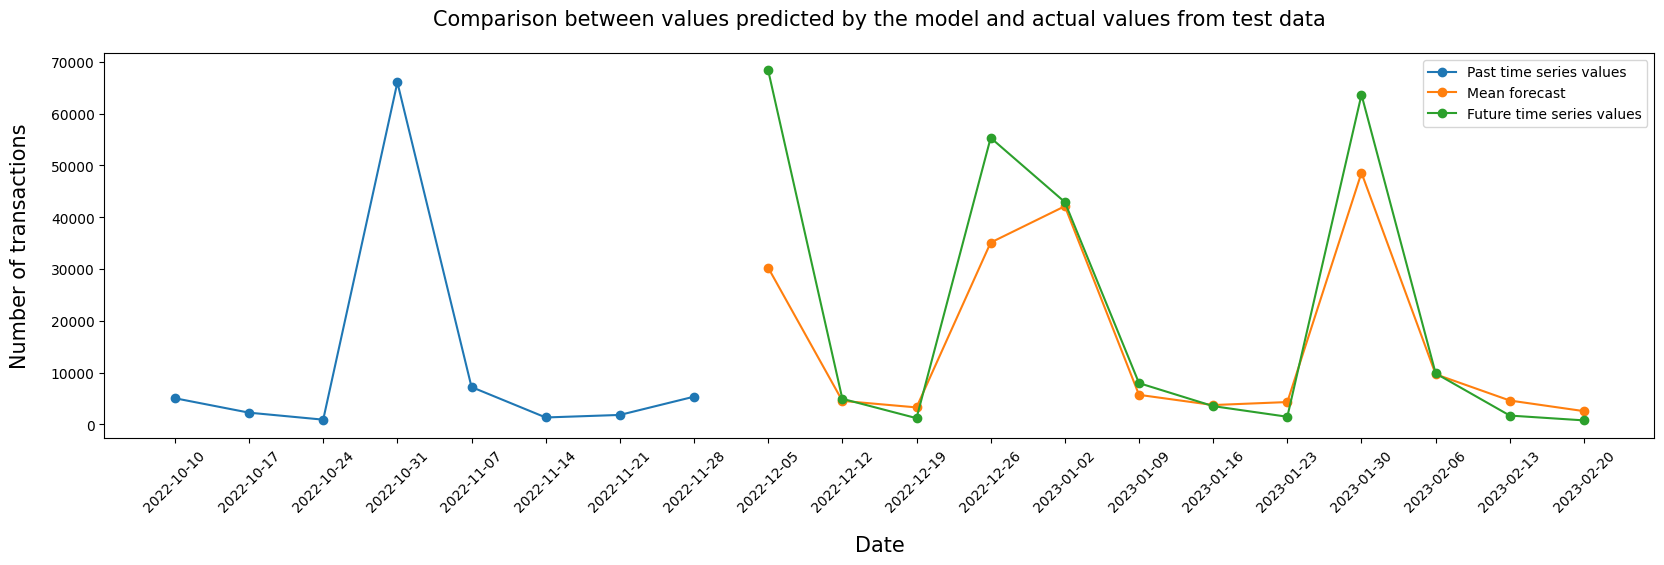

In [48]:
plt.figure(figsize=(20, 5))
plt.title("Comparison between values predicted by the model and actual values from test data", pad=20, fontsize=15)

item_id = "PL01"
y_past = train_data.loc[item_id]["target"]
y_pred = predictions.loc[item_id]
y_test = test_data.loc[item_id]["target"][:12]

# Get the dates for each observation
all_dates = list(y_past.index[-8:]) + list(y_test.index)
all_ticks = range(len(all_dates))

# Set the x-axis range for past and future
past_ticks = range(8)
future_ticks = range(8, len(all_dates))

plt.plot(past_ticks, y_past[-8:], label="Past time series values", marker='o', linestyle='-')
plt.plot(future_ticks, y_pred["mean"], label="Mean forecast", marker='o', linestyle='-')
plt.plot(future_ticks, y_test, label="Future time series values", marker='o', linestyle='-')



# Set x-axis labels with dates without time
date_labels = [date.strftime("%Y-%m-%d") for date in all_dates]
plt.xticks(all_ticks, date_labels, rotation=45)

# Add label for x-axis and y-axis
plt.xlabel("Date", fontsize=15, labelpad=15)
plt.ylabel("Number of transactions", fontsize=15, labelpad=15)

plt.legend()
plt.show()

In [44]:
predictions

mean           0.1           0.2           0.3  \
item_id timestamp                                                            
FR13    2022-12-05   8303.881942   2815.166571   3728.267155   5306.890434   
        2022-12-12   2341.631139  -1086.053857   -227.695973    827.473044   
        2022-12-19   4804.512674  -2068.255425    183.878004   1884.980383   
        2022-12-26  33796.953575   9075.855295  17267.772285  23752.085163   
        2023-01-02  12743.981754   2505.027994   6028.911524   8151.299975   
        2023-01-09   2416.142661  -1383.098018   -208.462433    829.538726   
        2023-01-16   2000.310789  -2342.756127  -1008.997305    169.957981   
        2023-01-23  14865.481914    932.272123   5923.117269   9197.153912   
        2023-01-30  32183.674340  10047.203777  17317.892978  22634.100309   
        2023-02-06   5372.178041  -1168.641410    404.957169   1787.789235   
        2023-02-13   3433.848071  -2554.249450   -624.720024    855.605295   
        2023-02-20   5592.550004  -3128.864804    113.733196   1998.597037   
GB02    2022-12-05   7748.164499   1086.065788   3565.758942   5111.764718   
        2022-12-12   2356.983800    344.123958   1054.537484   1542.383061   
        2022-12-19   2123.527458   -861.374531    203.665387    871.782697   
        2022-12-26   6058.295829  -1703.876028    877.554003   2964.379361   
        2023-01-02  19921.633962   8067.330240  12899.878198  16181.958000   
        2023-01-09   3347.160643    116.032591   1166.159800   1875.976741   
        2023-01-16   2634.825876    -16.111536   1000.483733   1552.826070   
        2023-01-23   3053.772755   -318.413171   1062.845867   1703.065635   
        2023-01-30  18529.697105   6185.944670  11816.194491  14552.653664   
        2023-02-06   8292.238302   1578.980735   3812.174256   5187.381811   
        2023-02-13   2552.192836   -300.128229    770.726026   1400.487516   
        2023-02-20   2182.623527   -564.766499    556.618704   1022.689691   
IT01    2022-12-05   3177.704926   1611.569330   2166.979920   2425.016438   
        2022-12-12   1427.168743    454.759933    748.428632   1017.060594   
        2022-12-19   1430.119326    186.371355    601.002164    939.235690   
        2022-12-26   4256.929410   1464.173564   2425.475828   3198.145201   
        2023-01-02   3814.526893   1485.497239   2468.483620   2796.286406   
        2023-01-09   1079.438842    259.747206    532.653564    739.632356   
        2023-01-16   2103.030077    663.071712   1173.211715   1528.854957   
        2023-01-23   1632.768306    192.670281    696.749325   1033.899604   
        2023-01-30   5321.376126   2576.996313   3535.437195   4159.027258   
        2023-02-06   1444.753399    416.100240    727.928492    926.098371   
        2023-02-13   1212.767821    173.662288    530.183278    781.428717   
        2023-02-20   1388.274245    151.432455    615.143924    878.044543   
PL01    2022-12-05  30245.234673  12081.128446  17123.361067  21280.317484   
        2022-12-12   4545.560395   -200.829498   1019.880135   2514.079624   
        2022-12-19   3281.237171  -2596.467070   -620.502053    887.348755   
        2022-12-26  35104.584554  11831.341978  18967.675284  26970.823471   
        2023-01-02  42125.054916  13848.009581  22058.840557  28992.762343   
        2023-01-09   5709.075824  -1958.725872   -351.432346   2008.769484   
        2023-01-16   3738.944311  -3101.562688  -1295.804374    515.371947   
        2023-01-23   4316.354960  -3767.462646  -1110.600543    836.438472   
        2023-01-30  48576.578550  18798.997814  30114.386562  38005.763655   
        2023-02-06   9680.750759  -1184.121390   1310.512626   3739.006376   
        2023-02-13   4612.381840  -4085.566975  -1507.417256    661.688473   
        2023-02-20   2561.288795  -5778.447071  -2862.344721  -1019.526293   
RO01    2022-12-05   7393.369996   3190.802000   4459.575392   5416.610628   
        2022-12-12   1858.793205    408.111707    